<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter10/Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# verify the dataset has been downloaded
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [43]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers

In [33]:
model.layers[1].name

'dense_3'

In [35]:
x = model.get_layer('dense_3')
x

In [36]:
x.name is model.layers[1].name

True

In [37]:
weights, bias = x.get_weights()
print(weights.shape, bias.shape)

(784, 512) (512,)


In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4937 - accuracy: 0.8225 - val_loss: 0.4361 - val_accuracy: 0.8407
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3703 - accuracy: 0.8648 - val_loss: 0.4051 - val_accuracy: 0.8543
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3305 - accuracy: 0.8791 - val_loss: 0.3556 - val_accuracy: 0.8712
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3093 - accuracy: 0.8841 - val_loss: 0.3333 - val_accuracy: 0.8830
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2886 - accuracy: 0.8928 - val_loss: 0.3261 - val_accuracy: 0.8842
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.8987 - val_loss: 0.3261 - val_accuracy: 0.8861
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9026 - val_loss: 0.3385 - val_accuracy:

In [45]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8817


[0.3471623957157135, 0.8816999793052673]

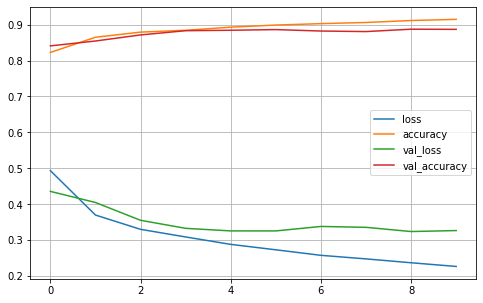

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.show()


In [51]:
x_new = x_test[:5]
y_new = model.predict(x_new)
y_new.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.13, 0.  , 0.02, 0.  , 0.  , 0.  , 0.85, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [57]:
y_classes = model.predict_classes(x_new)
y_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6])

In [58]:
import numpy as np

np.argmax(model.predict(x_new), axis=-1)

array([9, 2, 1, 1, 6])